In [48]:
import numpy as np 
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras
from sklearn.metrics import classification_report
import time

In [2]:
path_to_images = './archive/train'

In [3]:
haars_cascade_frontal_face = './haarcascade_frontalface_default.xml'

In [4]:
haars_cascade_eye = './haarcascade_eye.xml'

In [5]:
labels = os.listdir(path_to_images)

In [6]:
labels

['Closed', 'Open']

In [10]:
for label in labels:
    print(f"elementos {label} - 10 primeiros elementos")
    elements = os.listdir(os.path.join(path_to_images,label))
    print(f"{elements[0:10]}")

elementos Closed - 10 primeiros elementos
['_0.jpg', '_1.jpg', '_10.jpg', '_100.jpg', '_101.jpg', '_102.jpg', '_103.jpg', '_104.jpg', '_105.jpg', '_106.jpg']
elementos Open - 10 primeiros elementos
['_0.jpg', '_1.jpg', '_10.jpg', '_100.jpg', '_101.jpg', '_102.jpg', '_103.jpg', '_104.jpg', '_105.jpg', '_106.jpg']


In [9]:
elements

['_0.jpg',
 '_1.jpg',
 '_10.jpg',
 '_100.jpg',
 '_101.jpg',
 '_102.jpg',
 '_103.jpg',
 '_104.jpg',
 '_105.jpg',
 '_106.jpg',
 '_107.jpg',
 '_108.jpg',
 '_109.jpg',
 '_11.jpg',
 '_110.jpg',
 '_111.jpg',
 '_112.jpg',
 '_113.jpg',
 '_114.jpg',
 '_115.jpg',
 '_116.jpg',
 '_117.jpg',
 '_118.jpg',
 '_119.jpg',
 '_12.jpg',
 '_120.jpg',
 '_121.jpg',
 '_122.jpg',
 '_123.jpg',
 '_124.jpg',
 '_125.jpg',
 '_126.jpg',
 '_127.jpg',
 '_128.jpg',
 '_129.jpg',
 '_13.jpg',
 '_130.jpg',
 '_131.jpg',
 '_132.jpg',
 '_133.jpg',
 '_134.jpg',
 '_135.jpg',
 '_136.jpg',
 '_137.jpg',
 '_138.jpg',
 '_139.jpg',
 '_14.jpg',
 '_140.jpg',
 '_141.jpg',
 '_142.jpg',
 '_143.jpg',
 '_144.jpg',
 '_145.jpg',
 '_146.jpg',
 '_147.jpg',
 '_148.jpg',
 '_149.jpg',
 '_15.jpg',
 '_150.jpg',
 '_151.jpg',
 '_152.jpg',
 '_153.jpg',
 '_154.jpg',
 '_155.jpg',
 '_156.jpg',
 '_157.jpg',
 '_158.jpg',
 '_159.jpg',
 '_16.jpg',
 '_160.jpg',
 '_161.jpg',
 '_162.jpg',
 '_163.jpg',
 '_164.jpg',
 '_165.jpg',
 '_166.jpg',
 '_167.jpg',
 '_168.jpg

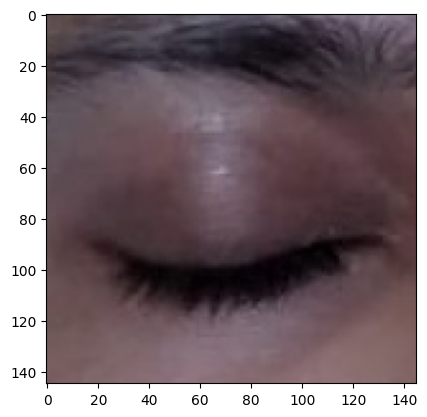

In [11]:

image = plt.imread(path_to_images+"/Closed/_0.jpg")
plt.imshow(image)

In [34]:
image.shape

(145, 145, 3)

In [12]:
datasets = os.path.join(os.getcwd(),'archive/train')

In [13]:
datasets

'C:\\Users\\perei\\OneDrive\\Área de Trabalho\\visao-computacional\\modelo close-open\\archive/train'

In [14]:
labels

['Closed', 'Open']

In [15]:
#variaveis para tratamento de imagens
img_width = 160 #valor arbitrario
img_heigth = 160 #valor arbitrario
img_color_channel = 3
img_color_channel_size = 255
img_size = (img_width, img_heigth)
img_shape = img_size + (img_color_channel,)


##variaveis usados no treinamento
batch_size = 32 #quantidade de features trazidas por vez do dataset
epochs = 5 #numeor de vezez que o dataset será percorrido
            #por uma questão de limitação de hardware vamos manter 5
learning_rate = 0.0001 #taxa e aprendizagem

class_name = labels #problema de classificação
#como não queremos ver um numero ao final do processo defimos
#0-yawn
#1-no_yawn
#2-Closed
#3-Open

In [16]:
dataset_Closed_len = len(os.listdir(os.path.join(datasets,'Closed')))
dataset_Open_len = len(os.listdir(os.path.join(datasets,'Open')))

In [17]:
print('Train closed %s' % dataset_Closed_len)
print('Train open %s' % dataset_Open_len)

Train closed 726
Train open 726


In [30]:
def gen_data():
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(path_to_images, label)
        class_num = labels.index(label)
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return np.array(data, dtype=object)

In [31]:
data_train = gen_data()

0
1


In [34]:
X = []
y = []
for feature, label in data_train:
    X.append(feature)
    y.append(label)

In [35]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

In [36]:
X.shape

(1452, 145, 145, 3)

In [ ]:
#Poderia usar o onehot encoding, mas, seria melhor usar em um problemas de linguagem natural

In [ ]:
"""
Vários algoritmos de regressão e classificação binária estão disponíveis no scikit-learn.
Uma maneira simples de estender esses algoritmos para o caso de classificação multiclasse
é usar o chamado esquema um contra todos.
Na hora de aprender, isso consiste simplesmente em aprender um regressor ou classificador binário por classe.
Ao fazer isso, é necessário converter rótulos multiclasse em rótulos binários (pertencem ou não à classe).
LabelBinarizerfacilita esse processo com o método transform.


https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html
"""

In [37]:
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

In [38]:
y = np.array(y)

In [39]:
y.shape

(1452, 1)

In [40]:
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [57]:
#divisão de dados de treino e testes

In [41]:
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

In [42]:
len(X_test)

436

In [43]:
#aplicando data_augmentation -> o modelo incial sofreu overfitting
#fazendo isso podemos aumentar o numero de features sem necessariamente conseguir novas features
#isso ira fazer o modelo olhar diferentes imagens a cadas vez que for treinado
#no primeiro caso tivemos overfitting, por essa razão estamos usando essa camada agora

#conceito de fature enginner aplicado a um modelo de classificação de imagens

In [44]:
gen_train = ImageDataGenerator(rescale=1/255, zoom_range=0.3, horizontal_flip=True, rotation_range=45)
gen_test = ImageDataGenerator(rescale=1/255)

gen_train = gen_train.flow(np.array(X_train), y_train, shuffle=False)#manter shuffle false
gen_test = gen_test.flow(np.array(X_test), y_test, shuffle=False)#manter shuffle false

In [45]:
len(gen_train),len(gen_test),len(gen_train),len(gen_test)

(32, 14, 32, 14)

In [71]:
#não está mais sendo utilizado esse trecho abaixo ;)

In [73]:
#criando modelo com uma rede neural convulacional
#modelo sequencial em camadas


# model = tf.keras.models.Sequential([
#     #aplica rescaling da imagen (160,160, 3)
#     #não queremos que os valores vão de 0 a 255, apenas de 0 a 3
#     #isso é chamado de normalização de valores
#     tf.keras.layers.Rescaling(
#         1. /img_color_channel_size,
#         input_shape = img_shape
#     ),
#     #filters,kernel_size,paddingactivation
#     #activation-> função de ativação
#     #funções de ativaçoes disponivel em  https://www.tensorflow.org/api_docs/python/tf/keras/activations
#     #função relu aplica a função de ativação da unidade linear retificada. Mehlor no entendimento desse caso
#     #função relu zera valores negativos e parmanece os positivos
#     #camada convulacional de tamanho 16,
#     #essa camada será passada 16x, com kernel de tamanho 3
#     tf.keras.layers.Conv2D(16,3, padding='same',activation='relu'),
#     #dados dispostos bidemensionalmente
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(64,3, padding='same',activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(64,3, padding='same',activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     #Achata a entrada.
#     #aplica algoritmo de "achatamento"
#     tf.keras.layers.Flatten(),
#     #input -> inteiro,acvation function
#     #input -> dimensionalidade do espaço d esaida do modelo treinado
#     tf.keras.layers.Dense(128, activation='relu'),
#     #queremos apenas um valor de saida do nosso modelo por isso aplicamos 1 ao alor de input
#     #sigmoid ela retorna um valor entre -1 e 1
#     tf.keras.layers.Dropout(0.2), #o modleo inicial sofreu overfiting,
#                                  #essa camada garatira que nem todos os neuronios serão usadoas
#     tf.keras.layers.Dense(1, activation='sigmoid')#ativação sigmoidal, sigmoid(x) = 1 / (1 + exp(-x)).
# ])

In [54]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(2, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 143, 143, 256)     7168      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 71, 71, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 69, 69, 128)       295040    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 34, 34, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 16, 16, 64)      

In [55]:
initial_time = time.time()

history = model.fit(gen_train, epochs=50, validation_data=gen_test, shuffle=True, validation_steps=len(gen_test))

final_time = time.time()

Epoch 1/50
32/32 [==============================] - 236s 7s/step - loss: 0.5667 - accuracy: 0.3671 - val_loss: 0.2258 - val_accuracy: 0.4610
Epoch 2/50
32/32 [==============================] - 387s 11s/step - loss: 0.2929 - accuracy: 0.5020 - val_loss: 0.1997 - val_accuracy: 0.4885
Epoch 3/50
32/32 [==============================] - 406s 13s/step - loss: 0.2091 - accuracy: 0.5049 - val_loss: 0.1745 - val_accuracy: 0.5619
Epoch 4/50
32/32 [==============================] - 375s 12s/step - loss: 0.2284 - accuracy: 0.5217 - val_loss: 0.1690 - val_accuracy: 0.4794
Epoch 5/50
32/32 [==============================] - 362s 11s/step - loss: 0.1790 - accuracy: 0.5010 - val_loss: 0.1583 - val_accuracy: 0.4656
Epoch 6/50
32/32 [==============================] - 373s 11s/step - loss: 0.1670 - accuracy: 0.5039 - val_loss: 0.1057 - val_accuracy: 0.5115
Epoch 7/50
32/32 [==============================] - 370s 12s/step - loss: 0.1690 - accuracy: 0.5098 - val_loss: 0.1242 - val_accuracy: 0.5092
Epoch 8

In [56]:
total_time = final_time - initial_time
print(f"Tempo total de treinamento: {(total_time/60)/60} horas")

Tempo total de treinamento: 3.3813989126682285 horas


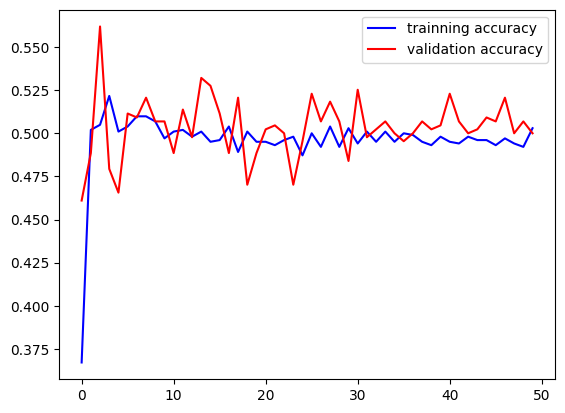

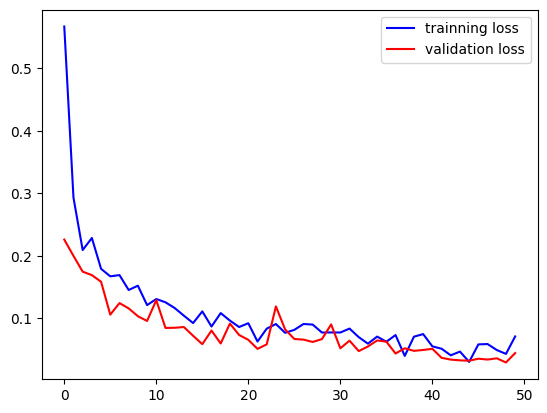

In [57]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [58]:
prediction = model.predict(X_test)

14/14 [==============================] - 17s 1s/step


In [59]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 12.569815635681152
Test accuracy: 0.4747706353664398


In [56]:
model.save("prediction_open_close.h5")